In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


## 1. Data description

This exercise is based on subset of data for the ["Give Me Some Credit" Kaggle competition] (https://www.kaggle.com/c/GiveMeSomeCredit), follow this link and take a look at the competition description.

### Getting the data
Dowload the data file called `credit_scoring_sample.csv` from https://github.com/Yorko/mlcourse.ai/tree/master/data


### Data columns
Not all of these columns are present in the sample data we user for this exercise

 - **SeriousDlqin2yrs** (prediction target) - Whether a person has been over 90 days late on a loan payment (or worse) in the past two years.
 - **RevolvingUtilizationOfUnsecuredLines** - Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
 - **age** - Age of borrower in years
 - **DebtRatio** - Monthly debt payments, alimony, living costs divided by monthly gross income
 - **MonthlyIncome** - Monthly income
 - **NumberOfOpenCreditLinesAndLoans** - Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
 - **NumberRealEstateLoansOrLines** - Number of mortgage and real estate loans including home equity lines of credit
 - **NumberOfDependents** - Number of dependents in family excluding themselves (spouse, children etc.)
 - **NumberOfTimes90DaysLate** - Number of times borrower has been 90 days or more past due.
 - **NumberOfTime60-89DaysPastDueNotWorse**	 - Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
 - **NumberOfTime30-59DaysPastDueNotWorse** - Number of times borrower has been 30-59 days past due but no worse in the last 2 years.


In [2]:
df = pd.read_csv('credit_scoring_sample.csv', sep=';')

In [3]:
df

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0
...,...,...,...,...,...,...,...,...
45058,1,31,0,0.824725,0,0,3000.0,1.0
45059,0,49,0,6530.000000,0,0,0.0,5.0
45060,1,38,0,0.475841,0,0,3000.0,2.0
45061,0,47,1,0.485198,0,0,11720.0,5.0


In [4]:
df.head().T

,0,1,2,3,4
SeriousDlqin2yrs,0.000000,0.0,0.000000,0.00000,1.00000
age,64.000000,58.0,41.000000,43.00000,49.00000
NumberOfTime30-59DaysPastDueNotWorse,0.000000,0.0,0.000000,0.00000,0.00000
DebtRatio,0.249908,3870.0,0.456127,0.00019,0.27182
NumberOfTimes90DaysLate,0.000000,0.0,0.000000,0.00000,0.00000
NumberOfTime60-89DaysPastDueNotWorse,0.000000,0.0,0.000000,0.00000,0.00000
MonthlyIncome,8158.000000,NaN,6666.000000,10500.00000,400.00000
NumberOfDependents,0.000000,0.0,0.000000,2.00000,0.00000


#### How many columns and samples do we have in this dataset?

In [5]:
#your code here
df.shape

(45063, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45063 entries, 0 to 45062
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      45063 non-null  int64  
 1   age                                   45063 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  45063 non-null  int64  
 3   DebtRatio                             45063 non-null  float64
 4   NumberOfTimes90DaysLate               45063 non-null  int64  
 5   NumberOfTime60-89DaysPastDueNotWorse  45063 non-null  int64  
 6   MonthlyIncome                         36420 non-null  float64
 7   NumberOfDependents                    43946 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 2.8 MB


In [7]:
df.describe()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
count,45063.000000,45063.000000,45063.000000,45063.000000,45063.000000,45063.000000,3.642000e+04,43946.000000
mean,0.222489,51.210949,0.750993,352.062688,0.570712,0.505870,6.452263e+03,0.789628
std,0.415922,14.651533,6.184521,2467.556358,6.173106,6.153609,1.263817e+04,1.130813
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,40.000000,0.000000,0.176373,0.000000,0.000000,3.286000e+03,0.000000
50%,0.000000,51.000000,0.000000,0.373949,0.000000,0.000000,5.166000e+03,0.000000
75%,0.000000,62.000000,0.000000,0.857027,0.000000,0.000000,8.000000e+03,1.000000
max,1.000000,107.000000,98.000000,326442.000000,98.000000,98.000000,1.794060e+06,10.000000


#### How many people in this dataset had serious trouble paying their debts?
 - It's the first column `SeriousDlqin2yrs`
 - This is the column we will be trying to predict today

In [8]:
#your code here
df["SeriousDlqin2yrs"].value_counts()


SeriousDlqin2yrs
0    35037
1    10026
Name: count, dtype: int64

#### Plot the bar chart of the SeriousDlqin2yrs column showing the number of people with serious trouble (`label 1`) and those without (`label 0`)

Text(0.5, 1.0, 'Distribution of SeriousDlqin2yrs')

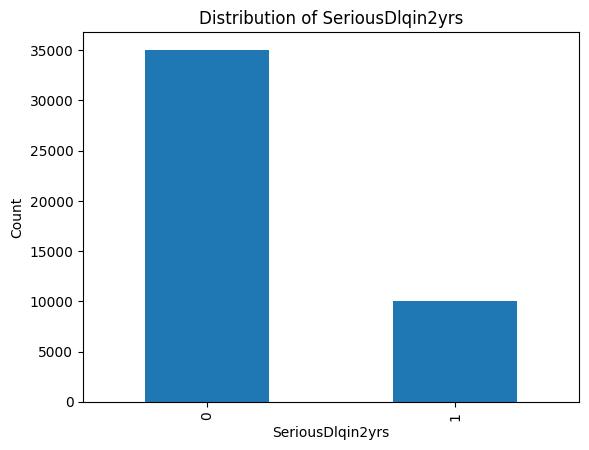

In [9]:
#your code here
plt.figure()
df["SeriousDlqin2yrs"].value_counts().plot.bar()
plt.xlabel("SeriousDlqin2yrs")
plt.ylabel("Count")
plt.title("Distribution of SeriousDlqin2yrs")

#### The bar chart shows that the data is imbalaced. That is the number of people with serious trouble is much less than those without.

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week11_LogisticRegression/assets/unbalanced.webp" width="600" hight="300" /> 

## 2. Designing Baseline

One of the most practical evaluation tools is a strong `baseline`—a simple method that gives you something to beat. 

Good baselines help you measure progress, catch bugs early, and understand the difficulty of your task. 

Sometimes they can even be surprisingly hard to beat.

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week11_LogisticRegression/assets/baseline_for_classification.png" width="600" height="500" />

#### Majority class baseline: What accuracy score would you expect from the optimistic classifier that expects no serious trouble at all?
 - This is our `dummy` classifier that predicts 0 for all samples
 - This is called the `Null accuracy`
 - Verify that accuracy score using the `accuracy_score()` function


In [10]:
#your code here
y_true = df["SeriousDlqin2yrs"]
y_pred = np.zeros(y_true.size)

accuracy_score(y_true, y_pred) * 100

77.75114839225084

#### Accuracy is not the only metric to evaluate a classifier! 
#### There are other important metrics such as `precision`, `recall` and `F1` score (you will learn about them in the future sections of this lab)
#### Calculate the precision, recall and F1 score of the optimistic classifier. 
- Use the `precision_score()`, `recall_score()` and `f1_score()` functions from `sklearn.metrics` module and pass `y_pred` and `y_true` values to them.

In [11]:
#your code here
print("Precision Score:", precision_score(y_true, y_pred))
print("Recall Score:", precision_score(y_true, y_pred))
print("F1 Score:", precision_score(y_true, y_pred))

Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0


c:\Users\Matth\Documents\PythonProjects\PyData2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matth\Documents\PythonProjects\PyData2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matth\Documents\PythonProjects\PyData2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

# 3. Data preprocessing

#### Are there any columns with missing (NaN) values?
Hint: isnull()

In [12]:
#your code here
df.isnull().sum()

SeriousDlqin2yrs                           0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfTimes90DaysLate                    0
NumberOfTime60-89DaysPastDueNotWorse       0
MonthlyIncome                           8643
NumberOfDependents                      1117
dtype: int64

#### Fill in all the missing values using the median value of the corresponding column
Hint: fillna()

In [13]:
#your code here
df.fillna(df.median(), inplace=True)

In [14]:
# Checking isnull after filling with median
df.isnull().sum()

SeriousDlqin2yrs                        0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfTimes90DaysLate                 0
NumberOfTime60-89DaysPastDueNotWorse    0
MonthlyIncome                           0
NumberOfDependents                      0
dtype: int64

#### Define X and y to experiment with some classifiers below

In [15]:
# We will be using all the columns except the target to base our preidctions on
# This is the list of the columns
cols = df.columns[1:].tolist()
cols

['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'MonthlyIncome',
 'NumberOfDependents']

In [16]:
# your code here
X = df[cols]
y = df["SeriousDlqin2yrs"]

In [17]:
X

,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,64,0,0.249908,0,0,8158.0,0.0
1,58,0,3870.000000,0,0,5166.0,0.0
2,41,0,0.456127,0,0,6666.0,0.0
3,43,0,0.000190,0,0,10500.0,2.0
4,49,0,0.271820,0,0,400.0,0.0
...,...,...,...,...,...,...,...
45058,31,0,0.824725,0,0,3000.0,1.0
45059,49,0,6530.000000,0,0,0.0,5.0
45060,38,0,0.475841,0,0,3000.0,2.0
45061,47,1,0.485198,0,0,11720.0,5.0


In [18]:
y

0        0
1        0
2        0
3        0
4        1
        ..
45058    1
45059    0
45060    1
45061    0
45062    1
Name: SeriousDlqin2yrs, Length: 45063, dtype: int64

# 4. Logistic Regression Model

#### Train a LogesticRegression model using ALL the data and find the accuracy_score
#### Set `max_iter=1000` in the LogisticRegression constructor to avoid a warning message


#### Call this model as `model`

Hint: There is no need to split the data

In [19]:
# your code here
model = LogisticRegression(max_iter=1000)

# fit your model with X and y
model.fit(X, y)

# predict the values and store them in y_pred_base
y_pred_base = model.predict(X)

#### How many people in the prediction has serious trouble with their loan payment (`Label 1`)?

In [20]:
#your code here
print(y_pred_base)
y_pred_base.sum()

[0 0 0 ... 0 0 0]


np.int64(1924)

#### How much better was the LogisticRegression model compared to the Null in terms of accuracy?

In [21]:
accuracy_score(y, y_pred_base)
# Logistic Regression model was only marginally better in terms of accuracy in comparison to the Null
# ~80% vs. ~77.75%

0.8002352262388212

#### Evaluate the base model using the confusion_matrix

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/60a92931f832544aebcfe09a9c26164015f9ed2a/Lab_Week11_LogisticRegression/assets/confusion_matrix.svg" width="800" /> 

In [22]:
#your code here
confusion_matrix(y, y_pred)

array([[35037,     0],
       [10026,     0]])

In [23]:
confusion_matrix(y, y_pred_base)

array([[34587,   450],
       [ 8552,  1474]])

#### Evaluate the base model using precision, recall and F1 score (the same you did for the Null model)

In [24]:
print("Accuracy Score:", accuracy_score(y, y_pred_base)*100)
print("Precision Score:", precision_score(y, y_pred_base)*100)
print("Recall Score:", recall_score(y, y_pred_base)*100)
print("F1 Score:", f1_score(y, y_pred_base)*100)


Accuracy Score: 80.02352262388212
Precision Score: 76.61122661122661
Recall Score: 14.701775384001595
F1 Score: 24.669456066945607


# 5. Dealing with Imbalanced Data: Assigning Higher Weights to the Minority Class

#### Running the logistic regression model with different `class_weight`

#### For class 0 (no trouble) set the weight to 1 and for class 1 (with trouble) set the weight to 2 - we give higher weight to the minority class


#### Call this model as `model_weighted`


In [25]:
#your code here
model_weighted = LogisticRegression(max_iter=1000, class_weight={0: 1, 1: 2})

# (1)fit your model and (2)predict the value and (3)compute accuracy
model_weighted.fit(X, y)

y_pred_weighted = model_weighted.predict(X)

In [26]:
print("Accuracy Score (Weighted Model):", accuracy_score(y, y_pred_weighted)*100)

Accuracy Score (Weighted Model): 82.1583116969576


#### How many people in the prediction made by `model_weighted` has serious trouble with their loan payment (`Label 1`)?

In [27]:
y_pred_weighted.sum()

np.int64(5828)

#### Evaluate the weighted model using the confusion_matrix, precision, recall and F1 score

In [28]:
#your code here
confusion_matrix(y, y_pred_weighted)

array([[33116,  1921],
       [ 6119,  3907]])

In [29]:
print("Precision Score (Weighted):", precision_score(y, y_pred_weighted)*100)
print("Recall Score: (Weighted)", recall_score(y, y_pred_weighted)*100)
print("F1 Score: (Weighted)", f1_score(y, y_pred_weighted)*100)

Precision Score (Weighted): 67.03843514070007
Recall Score: (Weighted) 38.96868142828646
F1 Score: (Weighted) 49.28724612085278


#### Compare and Contrast the results of the `model_weighted` with the `model`

#### Repeat the above with different values of `w` in the range between 1 and 10. Plot the accuracy score as a function of `w` label 1's weight


Text(0.5, 1.0, 'Accuracy vs. Weight for Label 1')

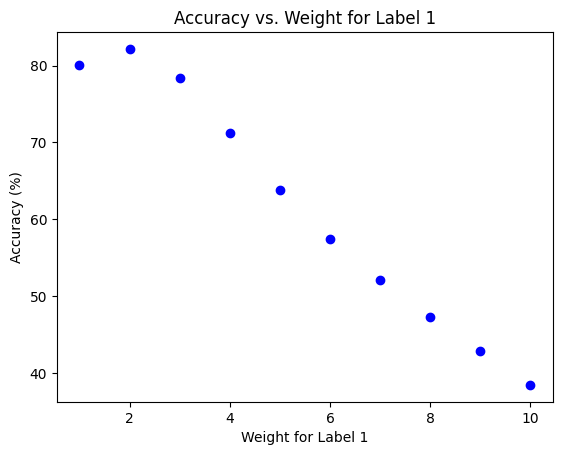

In [30]:
#your code here
accuracy_scores = []
weights = []

for i in range(1, 11):
    #your code here
    model_weighted_iter = LogisticRegression(max_iter=1000, class_weight={0: 1, 1: i})

    # (1)fit your model and (2)predict the value and (3)compute accuracy
    model_weighted_iter.fit(X, y)

    y_pred_weighted_iter = model_weighted_iter.predict(X)

    accuracy_scores.append(accuracy_score(y, y_pred_weighted_iter)*100)
    weights.append(i)

plt.figure()
plt.scatter(weights, accuracy_scores, color="blue", marker="o")
plt.xlabel("Weight for Label 1")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Weight for Label 1")

#### Based on the plot of scores, what is the best value for label 1 weight?

In [31]:
# Based on the plot, the best weight for label 1 is 2

#### Scikit Learn also has a function called `compute_class_weight` that automatically computes the weights based on the class distribution. 

In [32]:
from sklearn.utils.class_weight import compute_class_weight
classes = np.array([0, 1])  
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weights

array([0.64307732, 2.247307  ])

#### Make a logestic regression model with the computed class weights and evaluate it using the confusion_matrix, precision, recall and F1 score


#### Call this model as `auto_weighted model`

In [33]:
auto_weighted_model = LogisticRegression(max_iter=1000, class_weight={0: class_weights[0], 1: class_weights[1]})

auto_weighted_model.fit(X, y)

y_pred_auto_weighted = auto_weighted_model.predict(X)

print(confusion_matrix(y, y_pred_auto_weighted))

print("Precision Score (Weighted):", precision_score(y, y_pred_auto_weighted)*100)
print("Recall Score: (Weighted)", recall_score(y, y_pred_auto_weighted)*100)
print("F1 Score: (Weighted)", f1_score(y, y_pred_auto_weighted)*100)

[[27313  7724]
 [ 3545  6481]]
Precision Score (Weighted): 45.624780007039774
Recall Score: (Weighted) 64.64193097945342
F1 Score: (Weighted) 53.493458792455954


#### Compare and Contrast the results of the `auto_weighted model` with the `weighted model`

In [34]:
print("Weighted Confusion Matrix:\n", confusion_matrix(y, y_pred_weighted))

print("Auto-Weighted Confusion Matrix:\n", confusion_matrix(y, y_pred_auto_weighted))


Weighted Confusion Matrix:
 [[33116  1921]
 [ 6119  3907]]
Auto-Weighted Confusion Matrix:
 [[27313  7724]
 [ 3545  6481]]


#### Which model has higher type 1 error? and which model has higher type 2 error?

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week11_LogisticRegression/assets/confusion_error_type.png" width="600" hight="300" /> 

In [35]:
# Auto weighted model has the higher type 1 error (Auto: 7724 vs. Reg: 1921)

# Regular weighted model has the higher type 2 error (Reg: 6119 vs. Auto: 3545)

#### If we want to give people very large amount of credit, which model should we use? and why?

In [36]:
# For giving credit, the model that minimizes type 1 error would be better
# Therefore the regularly weighted model would be better (Type 1 error: Reg - 6119, Auto - 3545)
# This is better because minimizing Type 1 errors (false postitives) in this case would
# mean minimizing the amount of people who would get denied credit that could actually pay it back,
# as these are individuals who have never actually been excessively late on loan payments

#### Useful Resources to read about classification metrics
 - Use [Kavin Markham's notebook](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) as reference